# Tutorial Tubes Machine Learning

by Iriyanto - https://github.com/nene-na

Slide - https://drive.google.com/drive/u/0/folders/1UsZmeVTA24zUguDV06OCyOucmNzjOtHI

## K-Means Clustering

In [1]:
# library untuk mempermudah, untuk detailnya silahkan Google
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Langkah 1
Misal kita mempunyai data yang terdiri dari:
1. x1
2. x2
3. cluster (jika -1 berati belum menjadi anggota centroid tertentu)

In [2]:
data = [
    [2, 5, -1],
    [4, 5, -1],
    [4, 2, -1],
    [2, 2, -1],
    [9, 5, -1],
    [11, 5, -1],
    [11, 2, -1],
    [9, 2, -1]
]

df = pd.DataFrame(data, columns=['x1', 'x2', 'cluster'])
df

,x1,x2,cluster
0,2,5,-1
1,4,5,-1
2,4,2,-1
3,2,2,-1
4,9,5,-1
5,11,5,-1
6,11,2,-1
7,9,2,-1


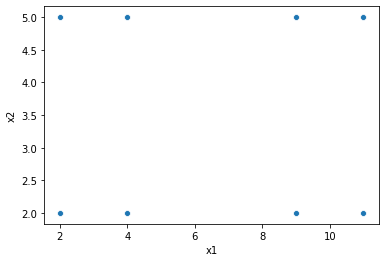

In [3]:
sns.scatterplot(x='x1', y='x2', data=df)

K-Means, k atau bisa disebut centroid adalah titik pusat dari cluster-cluster nantinya

Misal k = 2

Pilih dua centroid (biasanya digenerate / dibuat secara acak) dari 8 objek data (titik)

Misal kita disini membuat titik centroidnya berada pada:

In [4]:
# centroid baru
centroid = [
    [5, 4, 'Centroid A'], # x1=5, x2=4
    [7, 3, 'Centroid B'], # x1=7, x2=3
]

# kita buat menjadi dataframe
df_centroid = pd.DataFrame(centroid, columns=['x1', 'x2', 'cluster'])
df_centroid

,x1,x2,cluster
0,5,4,Centroid A
1,7,3,Centroid B


Coba kita plot bagaimana posisinya awal dari data kita

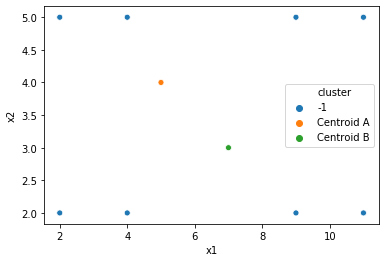

In [5]:
sns.scatterplot(x='x1', y='x2', hue='cluster', data=df.append(df_centroid))

## Langkah 2
Langkah selanjutnya yaitu menentukan anggota setiap klaster dengan memiilih centroid terdekat

Dengan Euclidean Distance:

<img src="https://www.codespeedy.com/wp-content/uploads/2020/01/Euclidean-Distance.png" width="300px">


In [6]:
# contoh menghitungnya untuk titik (2, 5) dengan centroid A (5, 4)
x1, y1 = df.iloc[0][['x1', 'x2']]
print('Titik 1 ({},{})'.format(x1, y1))

x2, y2 = df_centroid.iloc[0][['x1', 'x2']]
print('Centroid A ({},{})'.format(x2, y2))

# euclidean distant dengan hanya dua item pertitik
dist1A = ((x2-x1)**2 + (y2-y1)**2)**0.5

print('Jarak Titik 1 ke Centroid A adalah {}'.format(dist1A))

Titik 1 (2,5)
Centroid A (5,4)
Jarak Titik 1 ke Centroid A adalah 3.1622776601683795


In [7]:
# contoh menghitungnya untuk titik (2, 5) dengan centroid B (7, 3)
x1, y1 = df.iloc[0][['x1', 'x2']]
print('Titik 1 ({},{})'.format(x1, y1))

x2, y2 = df_centroid.iloc[1][['x1', 'x2']]
print('Centroid A ({},{})'.format(x2, y2))

# euclidean distant dengan hanya dua item pertitik
dist1B = ((x2-x1)**2 + (y2-y1)**2)**0.5

print('Jarak Titik 1 ke Centroid B adalah {}'.format(dist1B))

Titik 1 (2,5)
Centroid A (7,3)
Jarak Titik 1 ke Centroid B adalah 5.385164807134504


Nah, itu baru satu titik ke semua centroid

Selanjutnya kita bandingkan jaraknya, titik 1 ini lebih deket ke A apa ke B

In [8]:
hasil = 'Cluster A' if (dist1A < dist1B) else 'Cluster B'
print('Titik 1 ternyata masuk ke {}, atau lebih dekat ke Centroid A'.format(hasil))

Titik 1 ternyata masuk ke Cluster A, atau lebih dekat ke Centroid A


Nah, langkah diatas itu diulangi sampai semua titik itu terpilih ke centroid. Dan kita taruh hasilnya ke df kita diawal

Misal hasilnya seperti ini:

In [9]:
cluster = [
    'Cluster A', 'Cluster A', 'Cluster A', 'Cluster A',
    'Cluster B', 'Cluster B', 'Cluster B', 'Cluster B',
]

df['cluster'] = cluster

df

,x1,x2,cluster
0,2,5,Cluster A
1,4,5,Cluster A
2,4,2,Cluster A
3,2,2,Cluster A
4,9,5,Cluster B
5,11,5,Cluster B
6,11,2,Cluster B
7,9,2,Cluster B


Maka gambarannya seperti dibawah ini

1. Cluster A adalah titik yang menjadi anggota Centroid A
2. Cluster B adalah titik yang menjadi anggota Centroid B

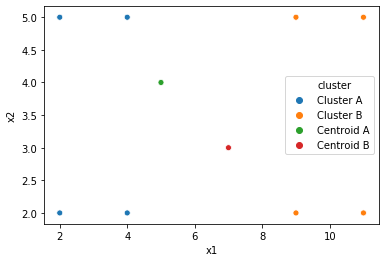

In [10]:
sns.scatterplot(x='x1', y='x2', hue='cluster', data=df.append(df_centroid))

## Langkah 3
Menentukan posisi baru untuk tiap centroid

Contoh kita mau memindahkan posisi Centroid A

In [11]:
# ambil x1 dari semua titik yang merupakan anggota centroid A
x1 = df[df['cluster'] == 'Cluster A']['x1'].tolist()

# ambil x2 dari semua titik yang merupakan anggota centroid A
x2 = df[df['cluster'] == 'Cluster A']['x2'].tolist()

# hitung rata-rata x1 titik 1
mean_x1_A = np.sum(x1) / len(x1)

# hitung rata-rata x1 titik 1
mean_x2_A = np.sum(x2) / len(x2)

# nah titik inilah titik baru untuk Centroid A
print('Centroid A pindah ke titik ({}, {})'.format(mean_x1_A, mean_x2_A))

Centroid A pindah ke titik (3.0, 3.5)


In [12]:
# misal centroid B
mean_x1_B = 10
mean_x2_B = 3.5

print('Centroid B pindah ke titik ({}, {})'.format(mean_x1_B, mean_x2_B))

Centroid B pindah ke titik (10, 3.5)


In [13]:
# masukan titik baru Centroid A
df_centroid.iloc[0,0] = mean_x1_A
df_centroid.iloc[0,1] = mean_x2_A

# masukan titik baru Centroid B
df_centroid.iloc[1,0] = mean_x1_B
df_centroid.iloc[1,1] = mean_x2_B

df_centroid

,x1,x2,cluster
0,3.0,3.5,Centroid A
1,10.0,3.5,Centroid B


## Langkah 4

Ulangi langkah 2 dan 3 sampai semua centroid tidak berubah posisinya

Jika tidak ada perubahan lagi, maka sudah selesai algoritma KMeans nya

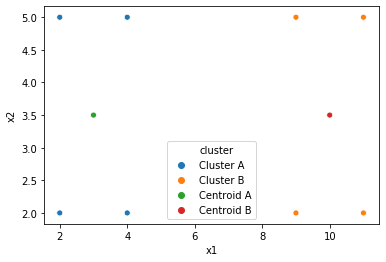

In [14]:
sns.scatterplot(x='x1', y='x2', hue='cluster', data=df.append(df_centroid))

# Selesai - Semoga membantu

Library dibawah untuk membuat data clustering secara otomatis

In [15]:
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

df_clustering = pd.DataFrame(X, columns=['x1', 'x2'])
df_clustering['cluster'] = y
df_clustering.head()

,x1,x2,cluster
0,-5.198113,0.641869,1
1,-5.752295,0.418627,1
2,-10.844898,-7.553523,0
3,-4.570985,-0.801017,1
4,-3.519162,0.039345,1


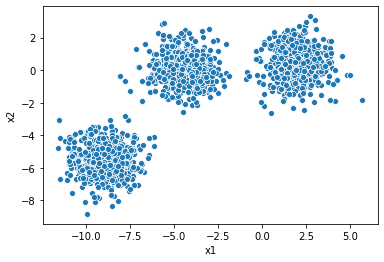

In [16]:
sns.scatterplot(x='x1', y='x2', data=df_clustering)

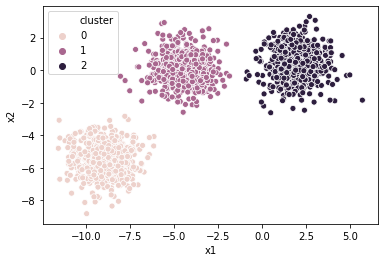

In [17]:
sns.scatterplot(x='x1', y='x2', hue='cluster', data=df_clustering)